In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['5th Grade','2010','5th Grade','2010'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,5th Grade,2010,43.0,0.6,-0.4 to 1.6,70,yellow,43.0,0.3,-0.4 to 1,66,yellow,"LOCKE, A CHTR",400011,4730,Charter,5th Grade,2010,93.6,87.2,90.4,48.9,23.4,36.2,44.7,63.8,54.3,6.4,12.8,9.6,0,0,0,47,47
1,AMANDLA CHTR HS,400012,Southwest Side HS Network,5th Grade,2010,52.2,1.0,0 to 2,84,green,52.2,0.7,0.1 to 1.4,77,green,AMANDLA CHTR HS,400012,2035,Charter,5th Grade,2010,67.1,73.7,70.4,19.7,6.6,13.2,47.4,67.1,57.2,32.9,26.3,29.6,0,0,0,76,76
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,5th Grade,2010,48.6,0.9,-0.1 to 1.9,81,yellow,48.6,1.6,1 to 2.3,94,green,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,3990,Charter,5th Grade,2010,71.4,79.6,75.5,16.3,8.2,12.2,55.1,71.4,63.3,28.6,20.4,24.5,0,0,0,49,49


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(426, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     67.98
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.09e-15
Time:                        22:47:20   Log-Likelihood:                -1779.3
No. Observations:                 426   AIC:                             3563.
Df Residuals:                     424   BIC:                             3571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     60.3696      0.766     78.837      0.000        58.864    61.875
x              6.2180      0.754      8.245      0.000         4.736     7.700
==============================================================================
Omnibus:                       12.466   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.124
Skew:                           0.372   Prob(JB):                      0.00233
Kurtosis:                       2.642   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

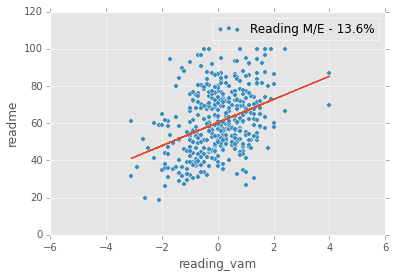

In [5]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E - 13.6%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     45.70
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           4.58e-11
Time:                        22:50:03   Log-Likelihood:                -1763.7
No. Observations:                 426   AIC:                             3531.
Df Residuals:                     424   BIC:                             3540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.2627      0.738     24.734      0.000        16.811    19.714
x              4.9159      0.727      6.760      0.000         3.487     6.345
==============================================================================
Omnibus:                      195.439   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              825.750
Skew:                           2.060   Prob(JB):                    4.90e-180
Kurtosis:                       8.435   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

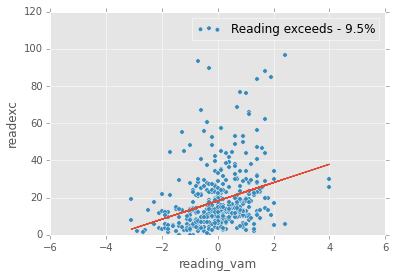

In [6]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading exceeds - 9.5%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7.661
Date:                Sat, 15 Aug 2015   Prob (F-statistic):            0.00589
Time:                        22:51:33   Log-Likelihood:                -1577.4
No. Observations:                 426   AIC:                             3159.
Df Residuals:                     424   BIC:                             3167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     42.1090      0.477     88.329      0.000        41.172    43.046
x              1.2995      0.470      2.768      0.006         0.377     2.222
==============================================================================
Omnibus:                       30.130   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.874
Skew:                          -0.522   Prob(JB):                     2.97e-10
Kurtosis:                       4.176   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

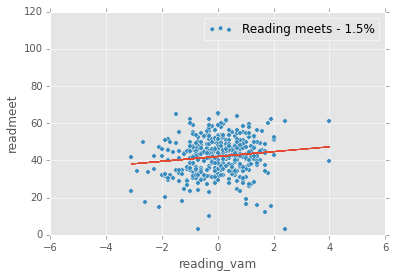

In [14]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading meets - 1.5%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     66.04
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           4.89e-15
Time:                        22:51:26   Log-Likelihood:                -1771.4
No. Observations:                 426   AIC:                             3547.
Df Residuals:                     424   BIC:                             3555.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.0161      0.752     51.894      0.000        37.538    40.494
x             -6.0174      0.740     -8.126      0.000        -7.473    -4.562
==============================================================================
Omnibus:                       12.426   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.234
Skew:                          -0.378   Prob(JB):                      0.00221
Kurtosis:                       2.657   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

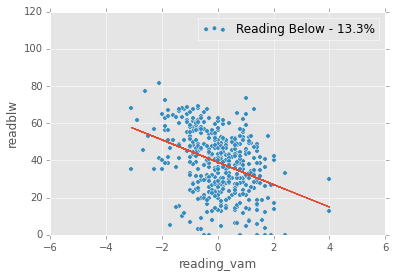

In [13]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below - 13.3%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     11.94
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           0.000604
Time:                        22:51:18   Log-Likelihood:                -684.11
No. Observations:                 426   AIC:                             1372.
Df Residuals:                     424   BIC:                             1380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6174      0.059     10.542      0.000         0.502     0.732
x             -0.1993      0.058     -3.456      0.001        -0.313    -0.086
==============================================================================
Omnibus:                      227.746   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1195.772
Skew:                           2.370   Prob(JB):                    2.19e-260
Kurtosis:                       9.700   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

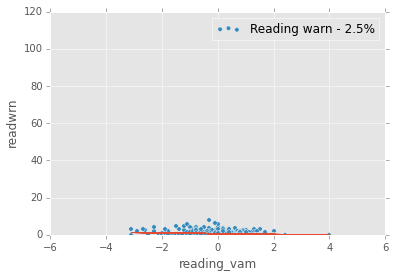

In [12]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading warn - 2.5%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     37.41
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.17e-09
Time:                        22:51:11   Log-Likelihood:                -1764.9
No. Observations:                 426   AIC:                             3534.
Df Residuals:                     424   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     71.9923      0.740     97.250      0.000        70.537    73.447
x              4.3385      0.709      6.117      0.000         2.944     5.733
==============================================================================
Omnibus:                        8.766   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.920
Skew:                          -0.216   Prob(JB):                       0.0314
Kurtosis:                       2.549   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

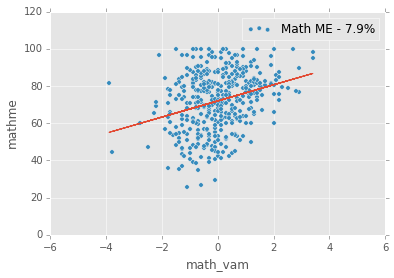

In [11]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()
#print(lm.params.Intercept)
#print(lm.params.x)
#print(lm.params)

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math ME - 7.9%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     28.22
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.76e-07
Time:                        22:51:58   Log-Likelihood:                -1670.8
No. Observations:                 426   AIC:                             3346.
Df Residuals:                     424   BIC:                             3354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.7192      0.594     16.373      0.000         8.552    10.886
x              3.0213      0.569      5.312      0.000         1.903     4.139
==============================================================================
Omnibus:                      260.400   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1881.442
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      11.830   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

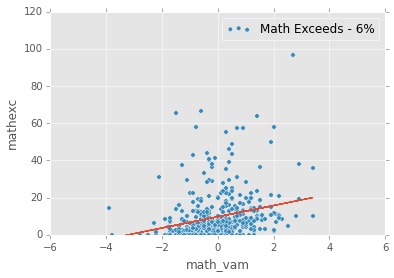

In [15]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds - 6%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.124
Date:                Sat, 15 Aug 2015   Prob (F-statistic):             0.0241
Time:                        22:52:13   Log-Likelihood:                -1680.4
No. Observations:                 426   AIC:                             3365.
Df Residuals:                     424   BIC:                             3373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     62.2719      0.607    102.565      0.000        61.079    63.465
x              1.3167      0.582      2.264      0.024         0.173     2.460
==============================================================================
Omnibus:                       29.642   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.916
Skew:                          -0.582   Prob(JB):                     9.63e-09
Kurtosis:                       3.852   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

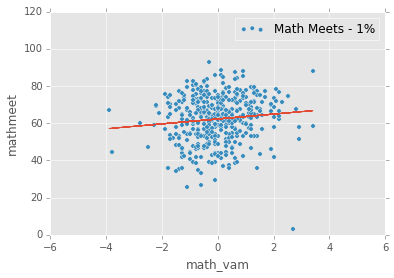

In [16]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets - 1%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     38.37
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.39e-09
Time:                        22:52:37   Log-Likelihood:                -1749.8
No. Observations:                 426   AIC:                             3504.
Df Residuals:                     424   BIC:                             3512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     27.1831      0.715     38.039      0.000        25.778    28.588
x             -4.2412      0.685     -6.194      0.000        -5.587    -2.895
==============================================================================
Omnibus:                        8.055   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.697
Skew:                           0.224   Prob(JB):                       0.0351
Kurtosis:                       2.580   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

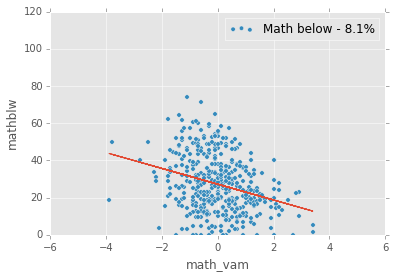

In [17]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math below - 8.1%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.707
Date:                Sat, 15 Aug 2015   Prob (F-statistic):              0.192
Time:                        22:52:54   Log-Likelihood:                -793.71
No. Observations:                 426   AIC:                             1591.
Df Residuals:                     424   BIC:                             1600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8237      0.076     10.876      0.000         0.675     0.973
x             -0.0948      0.073     -1.306      0.192        -0.237     0.048
==============================================================================
Omnibus:                      238.748   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1337.832
Skew:                           2.485   Prob(JB):                    3.12e-291
Kurtosis:                      10.119   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

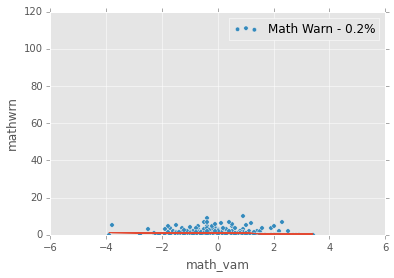

In [18]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn - 0.2%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()